# Classifier for Hand-written Digits

In [1]:
# imports
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
sys.path.append('..\..') # hack to make cnn project imports work
from Network import Network 
from Main import TestNetwork, TrainNetwork
from HyperParameters import HyperParameters

# Prepare Data
Loads data from Mnist files into three datasets. Displays some example data.

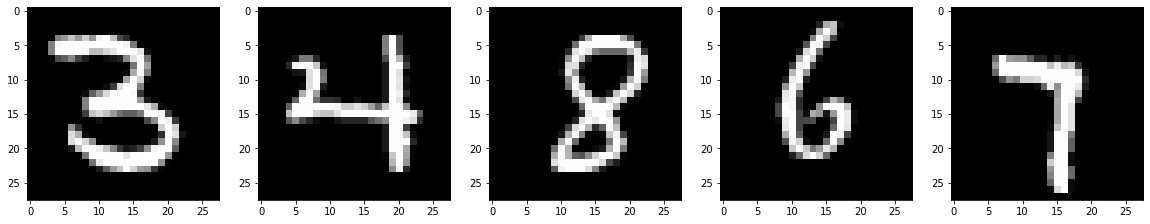

In [2]:
from Mnist import Mnist
ds_tr, ds_va, ds_te = Mnist.Load('data') # load training, validation and testing datasets

# plot some random examples from the training set
num_plots = 5
egs = random.choices(ds_tr.data, k=num_plots)
fig, axs = plt.subplots(ncols=5, figsize=(20,num_plots))
for i in range(num_plots): axs[i].imshow(Mnist.Expand(egs[i]), cmap='gray') # draw randomly expanded examples

# Create/Load Network

In [5]:
# create new network from json
net_str = ('{ "network": [ '
    '{ "layer": "input", "shape": [ 28,28,1 ] }, '
    '{ "layer": "full_con", "size": 200, "act_func": "leaky_relu" }, '
    '{ "layer": "full_con", "size": 50, "act_func": "leaky_relu" }, '
    '{ "layer": "softmax_output", "size": 10 } '
    '] }')
net = Network(json_str=net_str)
net.Print() # print network model

input: shape=(28, 28, 1)
full_con: size=200, act_func=leaky_relu
full_con: size=50, act_func=leaky_relu
softmax_output: size=10


In [3]:
net = Network(json_fn='nn_in.json') # load network from file
net.Print() # print network model

input: shape=(28, 28, 1)
full_con: size=50, act_func=sigmoid
xent_output: size=10, act_func=sigmoid


# Test Network Against Datasets

In [10]:
n_correct = TestNetwork(net, ds_tr) # test using training data
print('Training data: {:.2%}'.format(n_correct/ds_tr.num)) # display results
n_correct = TestNetwork(net, ds_te) # test using test data
print('Test data: {:.2%}'.format(n_correct/ds_te.num)) # display results

Training data: 99.12%
Test data: 98.47%


# Train/Save Network

In [9]:
# train network
params = HyperParameters(eta=0.05, L2=0.0001, mu=0.25, batch_size=128, expand_data=True) 
TrainNetwork(net, ds_tr, params, num_epochs=30)

Epoch 1: 98.57% (0m:20s)
Epoch 2: 98.64% (0m:19s)
Epoch 3: 98.44% (0m:21s)
Epoch 4: 98.66% (0m:24s)
Epoch 5: 98.72% (0m:19s)
Epoch 6: 98.75% (0m:19s)
Epoch 7: 98.62% (0m:20s)
Epoch 8: 98.67% (0m:20s)
Epoch 9: 98.78% (0m:20s)
Epoch 10: 98.88% (0m:20s)
Epoch 11: 98.75% (0m:20s)
Epoch 12: 98.98% (0m:21s)
Epoch 13: 98.95% (0m:20s)
Epoch 14: 98.88% (0m:20s)
Epoch 15: 98.93% (0m:20s)
Epoch 16: 98.79% (0m:19s)
Epoch 17: 98.96% (0m:20s)
Epoch 18: 98.97% (0m:20s)
Epoch 19: 99.09% (0m:19s)
Epoch 20: 99.01% (0m:19s)
Epoch 21: 99.12% (0m:20s)
Epoch 22: 99.15% (0m:20s)
Epoch 23: 99.09% (0m:19s)
Epoch 24: 99.18% (0m:19s)
Epoch 25: 99.18% (0m:19s)
Epoch 26: 99.16% (0m:20s)
Epoch 27: 99.02% (0m:19s)
Epoch 28: 99.12% (0m:19s)
Epoch 29: 99.20% (0m:19s)
Epoch 30: 99.12% (0m:21s)
Training over 30 epoch(s) complete (10m:09s).


In [ ]:
# save network to output file
net.Save('nn_out.json') 